<a href="https://colab.research.google.com/github/SuyeonSim/Data-analystic-Projec-public-/blob/main/%E2%98%85_%EB%AA%A8%EB%8F%84%EB%A6%AC_%EA%B0%9D%EB%8B%A8%EA%B0%80_%EB%B6%84%EC%84%9D(2020~2026)_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Github용 더미데이터 생성**

In [26]:
!pip install faker

import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker('ko_KR') # 한국어 설정

# 1. 더미 데이터 생성 (기존 데이터의 컬럼 구조 반영)
def generate_dummy_data(n=1000):
    data = []
    for _ in range(n):
        year = random.choice([2020, 2021, 2022, 2023, 2025, 2026])
        order_id = f"{year}{fake.date('%m%d')}-{fake.numerify('######')}"
        total_pay = random.randint(30000, 300000) # 총 결제금액

        data.append({
            '연도': year,
            '주문번호': order_id,
            '총 결제금액': total_pay,
            '판매가': total_pay - random.randint(0, 5000) # 판매가는 결제액보다 조금 크게 설정
        })
    return pd.DataFrame(data)

# 이제 df_clean 대신 df_dummy를 기본 데이터로 사용합니다.
df_dummy = generate_dummy_data(500)

### **M 브랜드 주문 데이터 업로드**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [18]:
import pandas as pd

# 1. 데이터 파일 경로 설정
# Google Drive 마운트 후 파일이 위치한 정확한 경로를 입력해주세요.
file_path = '/content/drive/MyDrive/modori-dataset/Folder-dataset/200101~260131 주문 내역_ID없음.csv'

# 2. 데이터 로드 (Raw Data)
# 인코딩은 일반적인 한글 깨짐 방지를 위해 'utf-8-sig' 또는 'cp949'를 사용합니다.
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp949')

# 3. 데이터 로드 결과 확인
# 데이터의 상위 5개 행과 전체적인 정보를 확인합니다.
print("--- Data Load Success ---")
print(f"Total Rows: {len(df)}")
display(df.head())
df.info()

--- Data Load Success ---
Total Rows: 228553


,연도,월,주문번호,총 주문금액,총 결제금액,주문상품명,주문상품명(옵션포함),수량,판매가,수령인,수령인 휴대전화,결제구분,결제수단,주문자명,환불금액,총 실결제금액(최초정보),총 배송비
0,2020,1,20200101-0000012,149000,146000,모도리 소담쿡웨어 세트,모도리 소담쿡웨어 세트,1,149000,NaN,NaN,T,"쿠폰,신용카드",NaN,0.0,146000.0,0.0
1,2020,1,20200101-0000029,149000,149000,모도리 소담쿡웨어 세트,모도리 소담쿡웨어 세트,1,149000,NaN,NaN,T,선불금,NaN,0.0,149000.0,0.0
2,2020,1,20200101-0000035,149000,146000,모도리 소담쿡웨어 세트,모도리 소담쿡웨어 세트,1,149000,NaN,NaN,T,"쿠폰,휴대폰",NaN,0.0,146000.0,0.0
3,2020,1,20200101-0000057,149000,146000,모도리 소담쿡웨어 세트,모도리 소담쿡웨어 세트,1,149000,NaN,NaN,T,"쿠폰,신용카드",NaN,0.0,146000.0,0.0
4,2020,1,20200101-0000075,174900,171900,모도리 올인원 실리콘 용기 (대),모도리 올인원 실리콘 용기 (대)(03_ 옵션을 선택해주세요. (사이즈:대)=[대]...,1,25900,NaN,NaN,T,"쿠폰,신용카드",NaN,0.0,171900.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228553 entries, 0 to 228552
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   연도             228553 non-null  int64  
 1   월              228553 non-null  int64  
 2   주문번호           228553 non-null  object 
 3   총 주문금액         228553 non-null  int64  
 4   총 결제금액         228553 non-null  int64  
 5   주문상품명          228553 non-null  object 
 6   주문상품명(옵션포함)    228553 non-null  object 
 7   수량             228553 non-null  int64  
 8   판매가            228553 non-null  int64  
 9   수령인            103341 non-null  object 
 10  수령인 휴대전화       142909 non-null  object 
 11  결제구분           204461 non-null  object 
 12  결제수단           204461 non-null  object 
 13  주문자명           121223 non-null  object 
 14  환불금액           204461 non-null  float64
 15  총 실결제금액(최초정보)  204461 non-null  float64
 16  총 배송비          204461 non-null  float64
dtypes: float64(3), int64(6), obje

In [3]:
df.describe()

,연도,월,총 주문금액,총 결제금액,수량,판매가,환불금액,총 실결제금액(최초정보),총 배송비
count,228553.000000,228553.000000,2.285530e+05,2.285530e+05,228553.000000,228553.000000,204461.0,2.044610e+05,204461.000000
mean,2021.113663,6.208976,1.154213e+05,1.130177e+05,1.048973,68457.691651,0.0,1.175614e+05,692.784932
std,1.249949,3.543070,1.317027e+05,1.451256e+05,0.871818,49317.216267,0.0,1.469746e+05,1164.368569
min,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00,0.000000
25%,2020.000000,3.000000,4.950000e+04,4.260000e+04,1.000000,29000.000000,0.0,5.490000e+04,0.000000
50%,2021.000000,6.000000,8.200000e+04,7.980000e+04,1.000000,65900.000000,0.0,9.100000e+04,0.000000
75%,2022.000000,9.000000,1.589000e+05,1.559000e+05,1.000000,86900.000000,0.0,1.576000e+05,2500.000000
max,2026.000000,12.000000,2.193000e+07,2.830732e+07,200.000000,229000.000000,0.0,2.830732e+07,3000.000000


In [7]:
# 주문번호가 중복되는 컬럼 찾아서 데이터값 불러오기

df[df.duplicated(subset='주문번호')]

,연도,월,주문번호,총 주문금액,총 결제금액,주문상품명,주문상품명(옵션포함),수량,판매가,수령인,수령인 휴대전화,결제구분,결제수단,주문자명,환불금액,총 실결제금액(최초정보),총 배송비
5,2020,1,20200101-0000075,174900,171900,모도리 소담쿡웨어 세트,모도리 소담쿡웨어 세트,1,149000,NaN,NaN,T,"쿠폰,신용카드",NaN,0.0,171900.0,0.0
15,2020,1,20200101-0000269,318700,315700,모도리 깔끔 식기세트,모도리 깔끔 식기세트(옵션을 선택해주세요.=03_ 깔끔식기 스톤그레이),1,59900,NaN,NaN,T,"쿠폰,신용카드",NaN,0.0,315700.0,0.0
16,2020,1,20200101-0000269,318700,315700,모도리 소담쿡웨어 세트,모도리 소담쿡웨어 세트,1,149000,NaN,NaN,T,"쿠폰,신용카드",NaN,0.0,315700.0,0.0
18,2020,1,20200101-0000294,358600,358600,모도리 올인원 실리콘 용기 세트,모도리 올인원 실리콘 용기 세트(세트구매하기 (3종)=[3종set] 올인원 실리콘 ...,1,49900,NaN,NaN,T,신용카드,NaN,0.0,358600.0,0.0
19,2020,1,20200101-0000294,358600,358600,모도리 깔끔 식기세트,모도리 깔끔 식기세트(옵션을 선택해주세요.=[set] 깔끔식기 사하라 샌드 2개),1,59900,NaN,NaN,T,신용카드,NaN,0.0,358600.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228541,2026,1,20260131-0000315,94700,79700,모도리 깔끔 도마 2P,모도리 깔끔 도마 2P,1,22900,박민우,010-8995-4836,NaN,NaN,NaN,NaN,NaN,NaN
228543,2026,1,20260131-0000329,28800,23800,모도리 깔끔 도마 (TPU/스텐),"모도리 깔끔 도마 (TPU/스텐)(구성=TPU 중, 색상=번트오렌지)",1,9900,김영준,010-4034-4348,NaN,NaN,NaN,NaN,NaN,NaN
228548,2026,1,20260131-0000373,74600,60410,모도리 깔끔 도마 (TPU/스텐),"모도리 깔끔 도마 (TPU/스텐)(구성=TPU 중, 색상=딥그레이)",1,9900,최명숙,010-4226-5981,NaN,NaN,NaN,NaN,NaN,NaN
228549,2026,1,20260131-0000373,74600,60410,모도리 깔끔 도마 (TPU/스텐),"모도리 깔끔 도마 (TPU/스텐)(구성=TPU 중, 색상=네이비)",1,9900,최명숙,010-4226-5981,NaN,NaN,NaN,NaN,NaN,NaN


### **데이터 전처리**

* 총 결제금액, 판매가 0원인 데이터 삭제
* 객단가 분석을 위해 중복 주문번호 행 삭제한 데이터프레임 생성

In [27]:
import pandas as pd

# 1. 원본 데이터 백업 (안전을 위해)
df_clean = df_dummy.copy()

# 2. 총 결제금액 > 0 이고 판매가 > 0 인 데이터만 추출
# 논리 연산자 & 를 사용하여 두 조건을 모두 만족하는 행만 남깁니다.
df_clean = df_clean[(df_clean['총 결제금액'] > 0) & (df_clean['판매가'] > 0)]

# 3. 중복 주문번호 제거
# 동일한 주문번호 중 첫 번째 데이터만 남깁니다. (Keep='first')
# 이렇게 하면 '주문 1건'에 대한 대표 정보만 남게 되어 객단가 계산에 용이합니다.
df_clean = df_clean.drop_duplicates(subset=['주문번호'], keep='first')

# 3. 주문일자 컬럼 생성
# 주문번호를 활용한 주문일자 컬럼 생성 (YYYYMMDD 형식 파싱)
# 주문번호의 앞 8자리를 추출하여 datetime 객체로 변환합니다.
df_clean['주문일자'] = pd.to_datetime(df['주문번호'].astype(str).str[:8], format='%Y%m%d')

# 4. 결과 확인
print(f"전처리 전 데이터 개수: {len(df_dummy)}개")
print(f"전처리 후 데이터 개수: {len(df_clean)}개")
print("-" * 30)
print(df_clean[['총 결제금액', '판매가']].describe())

# 5. 인덱스 재설정 (삭제된 행들로 인해 비어있는 인덱스 정리)
df_clean = df_clean.reset_index(drop=True)

전처리 전 데이터 개수: 500개
전처리 후 데이터 개수: 500개
------------------------------
              총 결제금액            판매가
count     500.000000     500.000000
mean   163205.366000  160726.110000
std     74145.181406   74108.124348
min     30799.000000   27659.000000
25%    100168.000000   98066.250000
50%    159148.000000  156997.500000
75%    225744.250000  225082.500000
max    299580.000000  299047.000000


### **2020~2026 연도별 객단가 추이**

--- 연도별 객단가 상세 수치 ---
     연도            객단가
0  2020  165823.513514
1  2021  162068.279070
2  2022  175501.815217
3  2023  167733.092784
4  2025  149950.250000
5  2026  154418.333333


/tmp/ipython-input-2576968173.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=yearly_atv, x='연도', y='객단가', palette='Blues_d', alpha=0.7)


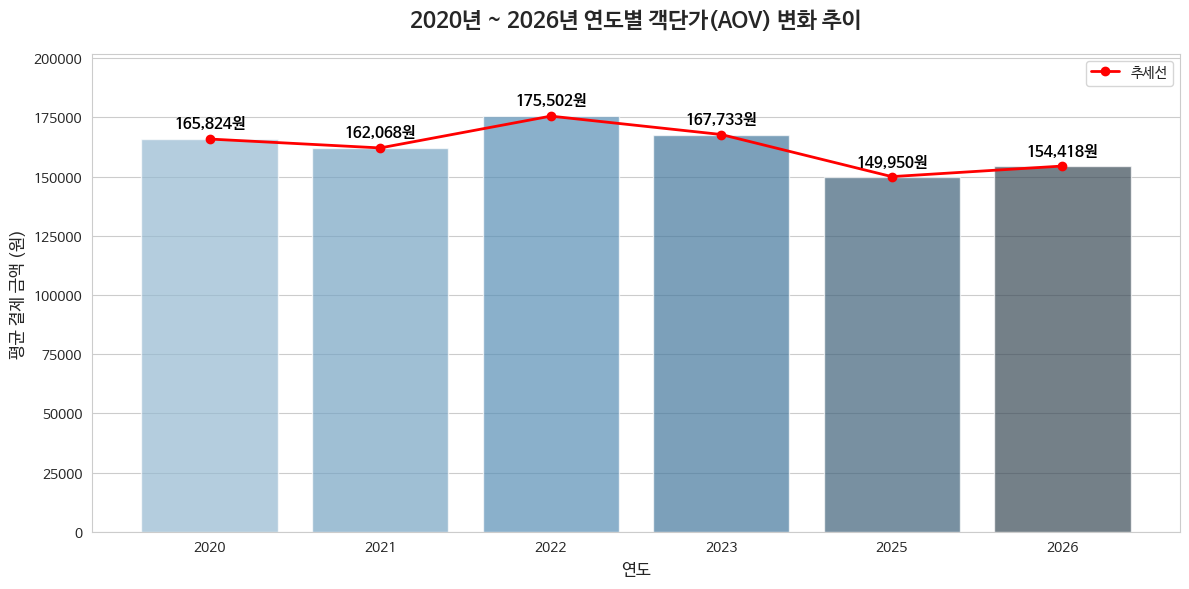

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 연도별 객단가 계산 (전처리된 df_clean 사용)
# 연도별로 그룹화하여 총 결제금액의 평균을 구합니다.
yearly_atv = df_clean.groupby('연도')['총 결제금액'].mean().reset_index()
yearly_atv.columns = ['연도', '객단가']

# 데이터 확인
print("--- 연도별 객단가 상세 수치 ---")
print(yearly_atv)

# 2. 시각화 설정
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") # 배경 격자 설정

# 한글 폰트 재설정 (필요 시)
plt.rc('font', family='NanumBarunGothic')

# 3. 막대 그래프와 선 그래프 혼합 시각화
# 막대 그래프 (Bar Plot)
barplot = sns.barplot(data=yearly_atv, x='연도', y='객단가', palette='Blues_d', alpha=0.7)

# 선 그래프 (Line Plot) - 추세를 더 명확하게 보여줌
plt.plot(range(len(yearly_atv)), yearly_atv['객단가'], color='red', marker='o', linewidth=2, label='추세선')

# 4. 그래프 꾸미기
plt.title('2020년 ~ 2026년 연도별 객단가(AOV) 변화 추이', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('연도', fontsize=12)
plt.ylabel('평균 결제 금액 (원)', fontsize=12)

# 금액 라벨 표시 (소수점 제거 및 정수 처리)
for i, row in yearly_atv.iterrows():
    # round(row['객단가'], 0)로 반올림 후 int()로 정수 변환하여 소수점을 아예 제거합니다.
    atv_value = int(round(row['객단가'], 0))

    plt.text(i, row['객단가'] + (row['객단가'] * 0.02), f"{atv_value:,}원",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Y축 범위를 현재 데이터 최대값의 1.15배(15% 추가 여유)로 설정
plt.ylim(0, yearly_atv['객단가'].max() * 1.15)

plt.legend()
plt.tight_layout()
plt.show()